In [2]:
import numpy as np

# Read A and B from text files
A = np.loadtxt('Kmat.txt')  # Each element in a new line
B = np.loadtxt('Fvec.txt')  # Each element in a new line


In [3]:
B

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.433883, 0.781831,
       0.974928, 0.974928, 0.781831, 0.433883, 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      ])

In [4]:
A.size

5929

In [5]:
B.size

77

In [6]:
A = A.reshape((A.size//B.size, B.size))      # Reshape A to n x n matrix

B = B.reshape((-1, 1))     # Make B a column vector


In [7]:
eigenvalues = np.linalg.eigvals(A)
# print(max(eigenvalues))
spectral_radius = max(abs(eigenvalues))
print(spectral_radius)

4.2412107448507905


In [8]:
A.shape

(77, 77)

In [9]:
D = np.diag(np.diag(A))
F = -(np.triu(A) - D)
E = -(np.tril(A) - D)

In [10]:
dum = D - E - F

In [11]:
dum

array([[ 1.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  2.881625,  0.      ,
         0.      ],
       [-0.357595,  0.      ,  0.      , ...,  0.      ,  2.880775,
         0.      ],
       [ 0.      ,  0.      , -0.399753, ...,  0.      ,  0.      ,
         2.7692  ]], shape=(77, 77))

In [12]:
x = np.array([0.0]*B.size).reshape((-1, 1))  # Initial guess (column vector)

In [13]:
# Jacobi Method
def jacobi(A, B, x, D, max_iterations=1000, tolerance=1e-6):
    # N = E + F
    M = D
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Jacobi):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Jacobi):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Jacobi method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [14]:
jacobi_solution = jacobi(A, B, x, D)
print("Jacobi Solution:\n", jacobi_solution.T)

Spectral Radius (Jacobi): 0.8827667041161453
Convergence rate (Jacobi): 0.05415405576788989
Jacobi method converged in 97 iterations.
Jacobi Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.433883   0.781831
  0.974928   0.974928   0.781831   0.433883   0.1954995  0.06609821
  0.31122666 0.06009967 0.29775446 0.12607278 0.05803159 0.52351644
  0.12233185 0.03853642 0.25615262 0.02749507 0.29633225 0.03957885
  0.64964719 0.0587484  0.04460827 0.1314965  0.03066981 0.10433939
  0.53682396 0.15399995 0.29916265 0.12158646 0.2111231  0.10155741
  0.21954055 0.34128061 0.12628362 0.03140152 0.69175874 0.05737618
  0.04295694 0.11660138 0.44511937 0.0690019  0.20047739 0.02455625
  0.51592446 0.02639856 0.16696223 0.02536269 0.02162665 0.45573103
  0.15902845 0.01341874 0.31133678 0.01564157 0.24948922]]

In [15]:
# Gauss-Seidel Method
def gauss_seidel(A, B, x, D, E, max_iterations=1000, tolerance=1e-6):
    # N = E + F
    M = D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Gauss-Seidel):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Gauss-Seidel):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Gauss-Seidel method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [16]:
gs_solution = gauss_seidel(A, B, x, D, E)
print("Gauss-Seidel Solution:\n", gs_solution.T)

Spectral Radius (Gauss-Seidel): 0.7818171537241174
Convergence rate (Gauss-Seidel): 0.10689480501402927
Gauss-Seidel method converged in 52 iterations.
Gauss-Seidel Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.433883   0.781831
  0.974928   0.974928   0.781831   0.433883   0.19550041 0.06609877
  0.31122717 0.06010018 0.29775504 0.12607338 0.05803216 0.52351703
  0.12233248 0.03853684 0.25615293 0.02749539 0.29633268 0.0395793
  0.64964756 0.05874881 0.04460864 0.13149686 0.03067018 0.10433982
  0.53682442 0.15400085 0.29916354 0.12158735 0.21112406 0.10155827
  0.2195414  0.34128149 0.12628449 0.03140192 0.69175914 0.05737647
  0.04295723 0.11660224 0.44512009 0.06900262 0.20047828 0.02455656
  0.51592479 0.02639885 0.16696248 0.02536302 0.02162691 0.45573135
  0.15902876 0.01341892 0.31133698 

In [17]:
np.linalg.norm(A @ gs_solution - B)  # Check if Ax = B

np.float64(1.160604294100291e-06)

In [18]:
np.linalg.norm(A @ jacobi_solution - B)  # Check if Ax = B

np.float64(2.2353964398768215e-06)

In [19]:
def SOR(A, B, x, D, E, omega=1.25, max_iterations=1000, tolerance=1e-6):
    M = (1/omega)*D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (SOR):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (SOR):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"SOR method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [20]:
# sor_solution = SOR(A, B, x, D, E,omega=1.9)
# print("SOR Solution:\n", sor_solution.T)

In [21]:
w = [1.1,1.3,1.6,1.9]

In [23]:
for i in w:
    print(f"Omega: {i}")
    sor_solution = SOR(A, B, x, D, E,omega=i)
    # print("SOR Solution:\n", sor_solution.T)
    print("\n")

Omega: 1.1
Spectral Radius (SOR): 0.734153609728341
Convergence rate (SOR): 0.13421306150394094
SOR method converged in 42 iterations.


Omega: 1.3
Spectral Radius (SOR): 0.5834084375689381
Convergence rate (SOR): 0.23402729416675067
SOR method converged in 25 iterations.


Omega: 1.6
Spectral Radius (SOR): 0.631104321744642
Convergence rate (SOR): 0.1998988458061723
SOR method converged in 34 iterations.


Omega: 1.9
Spectral Radius (SOR): 0.9089808026276979
Convergence rate (SOR): 0.04144528883622603
SOR method converged in 171 iterations.




In [31]:
#plotting omega vs convergence rate
omega_values = []
convergence_rates = []
w = np.arange(1.0, 2.0, 0.02)
for i in w:
    M = (1/i)*D - E
    G = np.linalg.inv(M) @ (M - A)
    rho = max(abs(np.linalg.eigvals(G)))
    omega_values.append(i)
    convergence_rates.append(-np.log10(rho))


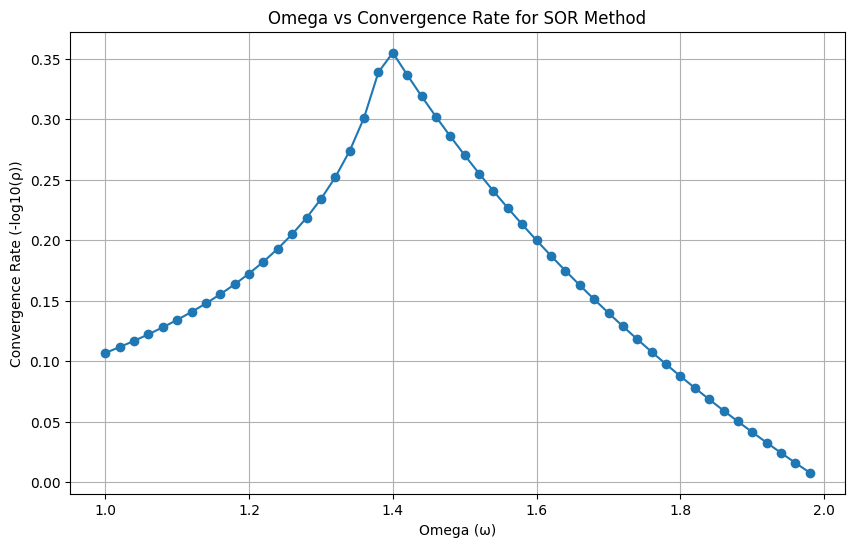

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.plot(omega_values, convergence_rates, marker='o')
plt.title('Omega vs Convergence Rate for SOR Method')
plt.xlabel('Omega (ω)')
plt.ylabel('Convergence Rate (-log10(ρ))')
plt.grid()
plt.show()
plt.savefig('omega_vs_convergence_rate.png')